# NMF - Non-Negative Matrix Functions

- Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features, by decomposing data to find latent factors which can be described by matrices.

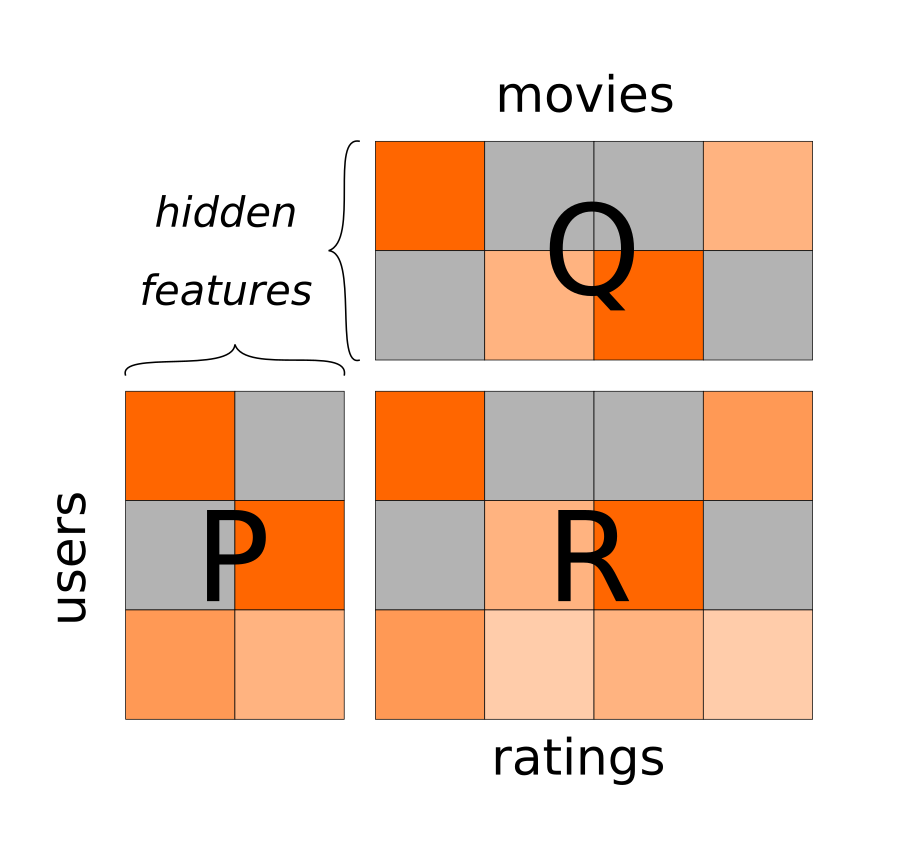

### Concepts

- user-item-matrix - a (usually very big) matrix R containing input data
- decomposition - R is decomposed into two matrices P and Q
- components - the extra dimension of P and Q that defines model complexity
- reconstruction - the product of P and Q approximates R
- sparsity - most values in the matrix are empty

### What is it used for?

- recommender systems
- customer segmentation
- topic modeling (e.g. on a bag of words)
- dimensionality reduction
- imputation of missing values


### The Idea

In a recommendation system like Netflix or MovieLens there is a set of users and a set of items (movies). Each user has rated some items in the system. We want to predict how users would rate items that they have not yet rated, so that we can make recommendations to users.

The information we have on existing ratings can be represented as a matrix. Suppose we have 4 users and 5 movies, and the ratings are integers from 1 to 5, the matrix may look like this:

|   User   | u1 | u2 | u3 | u4 |
|----------|----|----|----|----|
|Titanic   | 5  | 3  | 0  | 1  |
|Tiffany   | 4  | 2  | 0  | 1  |
|Terminator| 1  | 1  | 0  | 5  |
|Star Trek | 1  | 0  | 0  | 4  |
|Star Wars | 0  | 1  | 5  | 4  |

We want to describe our ratings R by a number of hidden features K. Our task is to find two matrices P and Q such that their product apprioximates R:

\begin{align}
\mathbf{R}\approx \mathbf{P}\times \mathbf{Q}^T =\hat{\mathbf{R}}
\end{align}

The intuition behind using matrix factorization to solve this problem is that there should be some latent features (e.g. a mapping of movie genres to user profiles) that determine how a user rates an item.

### Exercise

1. What movie recommendations could you generate for Steve?

2. How could you make the reconstucted matrix more similar to the original?

Change the genres to Romance and SciFi instead of Drama and Scifi!

NMF advantage - We can distribute this on many machines

This whole operation uses gradient descent to calculate!

We can use GradientBoosting to optimise this

3. Would it help to have more genres? DEFINITELY! 


4. Are the genres created by the procedure really genres? What other proerties of movies or users could these hidden features represent?

    - We don't know what we will get as hidden features - this is a disadvantage! We will get some segmentation 

5. Would the method suffer if some of your users are 'grumpy'?

    - If grumpy - might want to add an extra coefficient that will calibrate our model and take into account consistent bias!

### The maths
Our model has the following variables:

| variable | description | 
|----------|-------------|
| U | a set of users | 
| D | a set of items | 
| R | a U x D matrix containing all ratings | 
| K | number of latent features | 
| P | a U x K matrix | 
| Q | a D x K matrix | 

Each row of P represents the strength of the associations between a user and the features. Similarly, each row of Q represents the strength of the associations between an item and the features.

To get the prediction of a rating of an item d(j) by user u(i), we can calculate the dot product of their vectors:

\begin{align}
\hat{r}_{ij}=p_i^T \cdot q_j=\sum_{k=1}^K p_{ik} \cdot q_{kj}
\end{align}

### Error function
Usually there is a difference between the real and the calculated rating matrix:

\begin{align}
\mathbf{R} \approx \hat{\mathbf{R}}
\end{align}

This difference called the error between the estimated rating and the real rating, can be calculated for each user-item pair:

\begin{align}
e^2_{ij}=\left(r_{ij}-\hat{r}_{ij}\right)^2= \left(r_{ij}- \sum_{k=1}^K p_{ik}q_{kj}\right)^2
\end{align}

We consider the squared error because the estimated rating can be either higher or lower than the real rating.

### Error gradient
To minimize the error, we have to know in which direction we have to modify the values of p(ik) and q(jk). In other words, we need to know the gradient at the current values, and therefore we differentiate the above equation with respect to these two variables separately:

\begin{align}
\frac{\partial}{\partial p_{ik}} e^2_{ij}= -2\left(r_{ij}-\hat{r}_{ij}\right)(q_{kj})   =-2 e_{ij} q_{kj}
\end{align}

\begin{align}
\frac{\partial}{\partial q_{ik}} e^2_{ij}= -2\left(r_{ij}-\hat{r}_{ij}\right)(p_{ik})   =-2 e_{ij} p_{ik}
\end{align}

Having obtained the gradient, we can now formulate the update rules for both p(ik) and q(kj):

\begin{align}
p'_{ik}=p_{ik}+ \alpha \frac{\partial}{\partial p_{ik}} e^2_{ij}=p_{ik}+ 2\alpha  e_{ij} q_{kj} \\
q'_{kj}=q_{kj}+ \alpha \frac{\partial}{\partial q_{kj}} e^2_{ij}=q_{kj}+ 2 \alpha  e_{ij} q_{kj}
\end{align}

Where alpha is the learning rate.

For a given training set T we want to minimize our prediction error.

Using our update rule we can set E as stop parameter for a given tolerance.

\begin{align}
\mathbf{E}=\sum_{u_i,d_j,r_{ij} \in \mathbf{T}}e_{ij}= \sum_{u_i,d_j,r_{ij} \in \mathbf{T}} \left(r_{ij}- \sum_{k=1}^K p_{ik}q_{kj}\right)^2
\end{align}

### Regularization
We want to introduce a regularization method to avoid overfitting. This can be done by adding a parameter beta to the squared error term:

\begin{align}
e^2_{ij} = \left(r_{ij}-\hat{r}_{ij}\right)^2 = \left(r_{ij}- \sum_{k=1}^K p_{ik}q_{kj}\right)^2 +\frac{\beta}{2}\sum_{k=1}^K \left(||\mathbf{P}||^2+||\mathbf{Q}||^2\right)
\end{align}

This **regularization term** controls the magnitude of the user-features and item-features such that P and Q give a good approximation of R. So our new update rule could be

\begin{align}
p'_{ik}=p_{ik}+ \alpha \frac{\partial}{\partial p_{ik}} e^2_{ij}=p_{ik}+ \alpha\left( 2 e_{ij} q_{kj}-\beta p_{ik}\right)
\end{align}

\begin{align}
q'_{kj}=q_{kj}+ \alpha \frac{\partial}{\partial q_{kj}} e^2_{ij}=q_{kj}+ \alpha\left( 2 e_{ij} p_{ik}-\beta q_{kj}\right)
\end{align}

### Adding Biases
When the ratings are generated we also have to consider that some users might rate a movie generally higher than very sceptical users. These factors are called biases. So every users may have his or her bias b.

\begin{align}
\hat{r}_{ij}=b+b u_i+ bd_j + \sum_{k=1}^K p_{ik}q_{kj}
\end{align}

where b is the gobal bias, b u(i) is the bias of user i and bd(j) is the bias of item j.

Plugging this into our model would mean:

\begin{align}
b u'_i &= b u_i +\alpha \cdot\left(e_{ij}-\beta bu_i\right)
\end{align}

\begin{align}
b d'_j &= bd_j  +\alpha \cdot\left(e_{ij}-\beta bd_j\right)
\end{align}

the facorization converges faster when biases are applied.

### Algorithm
To find the optimal matrices P and Q, the approach is roughly:

1. Set the number of components
2. Set initial values for P and Q (e.g. randomly)
3. Reconstruct R by multiplying P and Q
4. Calculate the reconstruction error by comparing with the real data
5. Calculate the gradient of the reconstruction error
6. Modify P and Q accordingly
7. Iterate until P and Q converge

The algorithm is called Coordinate Descent and very closely related to gradient descent.

**Challenges Today:**

1. Run the code example in NMF exercise 2 and understand the code
2. Adapt the code example for movie data from your database
3. Implement NMF from scratch

In [1]:
import numpy as np
from sklearn.decomposition import NMF
import pandas as pd

# movie, ratings by users
data = [
    [5, 4, 1, 1, 3],
    [3, 2, 1, 3, 1],
    [3, 3, 3, 3, 5],
    [1, 1, 5, 4, 4],
]
columns = ['Titanic', 'Tiffany', 'Terminator', 'Star Trek', 'Star Wars'] #movies
index = ['Ada', 'Bob', 'Steve', 'Margaret'] #users

#need a dataframe for this
R = pd.DataFrame(data, index=index, columns=columns)
R

,Titanic,Tiffany,Terminator,Star Trek,Star Wars
Ada,5,4,1,1,3
Bob,3,2,1,3,1
Steve,3,3,3,3,5
Margaret,1,1,5,4,4


In [2]:
R = pd.DataFrame(data, index=index, columns=columns).values
R

array([[5, 4, 1, 1, 3],
       [3, 2, 1, 3, 1],
       [3, 3, 3, 3, 5],
       [1, 1, 5, 4, 4]])

In [3]:
#create a model and set the hyperparameters
# model assumes R ~ PQ'

model = NMF(n_components=2, init='random', random_state=10)

model.fit(R)

Q = model.components_  # movie-genre matrix

P = model.transform(R)  # user-genre matrix

print(f'Reconstruction Error E is {model.reconstruction_err_}') #reconstruction error
print()

nR = np.dot(P, Q)

print(nR) ## The reconstructed matrix!
print()

# predict the hidden features for a new data point
query = [[1, 2, 5, 4, 5]]

#in this case, a new user providing ratings for the 5 movies.
print(model.transform(query))

hidden_profile = model.transform(query)

Reconstruction Error E is 2.319822011025

[[4.98574011 3.98089613 0.69817861 1.52507923 2.84430572]
 [2.61580597 2.15486368 1.23495386 1.51110529 2.19736573]
 [3.35829506 2.89944467 3.32824145 3.36641177 4.23566511]
 [0.85105386 1.03300314 4.75334969 4.0532461  4.24705685]]

[[2.68231475 0.45631224]]


In [4]:
final_recommendations = np.dot(hidden_profile,Q)

In [5]:
final_recommendations

array([[1.44535619, 1.51878822, 4.98420316, 4.35586676, 4.70593025]])

In [6]:
new_user_query = [[1, 3, 3, 3, 5]]

In [7]:
new_hidden_profile = model.transform(new_user_query)

In [8]:
new_recommendation = np.dot(new_hidden_profile,Q)
new_recommendation = new_recommendation[0]
new_recommendation

array([2.19418536, 2.00472992, 3.62115293, 3.38348625, 3.94162915])

In [9]:
list(zip(columns, new_recommendation))

[('Titanic', 2.1941853562765763),
 ('Tiffany', 2.00472992243622),
 ('Terminator', 3.62115293296999),
 ('Star Trek', 3.38348624944436),
 ('Star Wars', 3.941629148091895)]